In [2]:
import numpy as np
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_full = fits.open("/home/taceroc/LaSerena/zpix-sv2-bright.fits")

In [4]:
data_full[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  642 / width of table in bytes                        
NAXIS2  =                82288 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                  116 / number of fields in each row                   
TTYPE1  = 'TARGETID'           / label for field   1                            
TFORM1  = 'K       '           / data format of field: 8-byte INTEGER           
TTYPE2  = 'HEALPIX '           / label for field   2                            
TFORM2  = 'J       '           / data format of field: 4-byte INTEGER           
TTYPE3  = 'SPGRPVAL'        

In [4]:
datas = data_full[1].data

In [5]:
datas.shape

(1051806,)

In [6]:
len(datas[0])

106

In [11]:
datas[0]

(8000, 250534, '0140m140', 4, 'DEV', 14.068052600474186, 625501340000.0, -14.122993189773611, 589086060000.0, array([34380.668, 38448.35 , 39359.773, 38700.184, 39349.703],
      dtype=float32), 0.026342522, 1.9859346, 10.538385, 25.16871, 556.5482, 150.63644, 32.30685, 0.9249836, 0.94882774, 0.97104573, 0.010367637, 0.0038242268, 0.0047267303, 0.010728313, 0.0065708198, 0.011166844, 0.99698544, 0.99785626, 0.9973535, 3, 3, 3, 1963.2085, 842.29834, 97.91261, 1149.9393, 424.1845, 60.017036, 43.4051, 25.635418, -46.416992, 63.89641, 2.6641254, 0.4798117, 0.0008706694, 1.2146989e-05, 0.9955457, 0.9972621, 0.99941546, 0.9997792, 0, 0, 0, 0.8141933, 4.3205266, 10.318666, 0.8164168, 4.3263516, 10.329078, 0.0, 0, 0, 0, 1.0, 1.0, 0.82117516, 0.029768864, -0.2105094, 11749.498, 5750.002, 10673.863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, '', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, False, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 'S', 35185422904590340, 1152921504606846976, 65537, 0, 0.7711840984536714, 

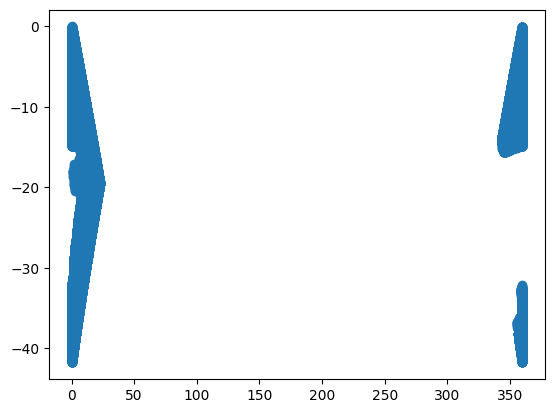

In [14]:
plt.scatter(datas["RA"], datas["DEC"])

In [67]:
data_reduce = datas[::100]

In [68]:
data_reduce.shape

(10519,)

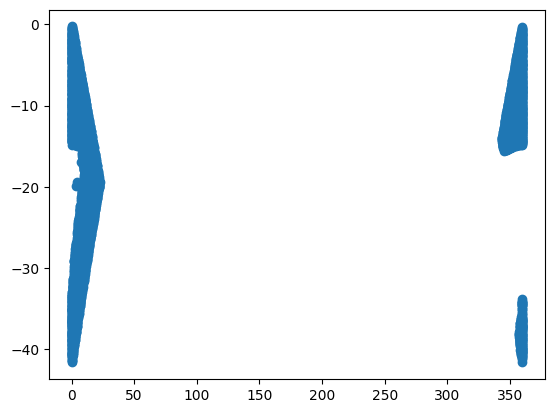

In [69]:
plt.scatter(data_reduce["RA"], data_reduce["DEC"])


In [70]:
data_reduce = data_reduce[data_reduce["PARALLAX"] > 0]

In [72]:
len(data_reduce)

3531

In [73]:
parallax = data_reduce[data_reduce["PARALLAX"] > 0]["PARALLAX"]

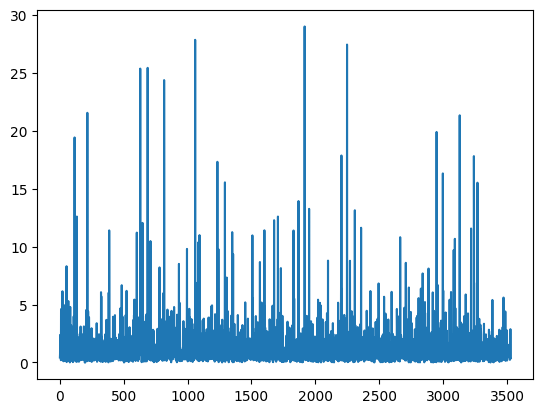

In [74]:
plt.plot(parallax)

In [28]:
from astropy import units as u
import astropy

In [62]:
distances = astropy.coordinates.Distance(parallax=parallax*u.mas, allow_negative=True)


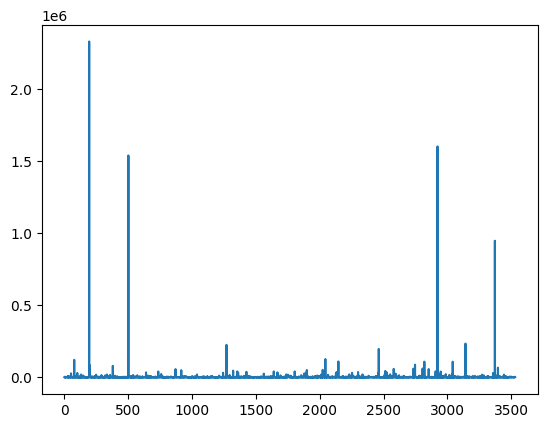

In [63]:
plt.plot(distances)

In [64]:
np.nanmax(distances.value), np.nanmin(distances.value)

(2326944.2, 34.51166)

In [65]:
distances.value

array([2297.9478 , 1366.3347 ,  420.49078, ..., 1322.2595 , 2427.2463 ,
       2774.3083 ], dtype=float32)

In [80]:
c = astropy.coordinates.SkyCoord(ra=data_reduce["RA"]*u.degree, dec=data_reduce["DEC"]*u.degree, distance=distances)

In [81]:
c

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [( 13.92142244, -13.93681555, 2297.9478 ),
     ( 14.70732841, -12.8285073 , 1366.3347 ),
     ( 14.08283385, -13.75135316,  420.49078), ...,
     (350.2909338 , -15.15767774, 1322.2595 ),
     (351.18718022, -15.20203697, 2427.2463 ),
     (351.32033545, -15.02155964, 2774.3083 )]>

In [82]:
c.cartesian.x

<Quantity [2164.78906493, 1288.57951954,  396.16240649, ..., 1257.97787763,
           2314.65710862, 2648.81869299] pc>